## Imports

In [1]:
import geopandas as gpd
import os, sys, copy, shutil, subprocess
import pathlib as pl
import fiona
import descartes
import json
import numpy as np
import sys
import logging
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('..')
from src import config as s_config
from src.data import process_inputs
from src.data import utils 
from src.grass_functions import *

### Get HUC number

In [2]:
huc_list_path = pl.Path(os.getcwd()).parent/'huc8.txt'
with open(huc_list_path, 'r') as txt_file:
    huc_list = []
    txt_reader = txt_file.read().splitlines() 
    for huc in txt_reader:
        huc_list.append(huc)

In [3]:
huc = huc_list[0]
logger.info("Selected 1st huc from list " + huc)

[2022-05-19 14:08:27,098] [INFO] [601608545] : Selected 1st huc from list 11030006


### Configure

In [4]:
os.environ["APP_ENV"] = 'LOCAL'
config = s_config.create_config(huc)

### Start grass session

In [5]:
config = create_grass_session(huc,config, overwrite=False)

[2022-05-19 14:08:32,553] [INFO] [utils] : creating timestamped log directory: /home/logs/huc11030006/20220519-140832
[2022-05-19 14:08:32,571] [INFO] [utils] : setting up GRASS session for HUC 11030006, EPSG 5070
[2022-05-19 14:08:33,549] [INFO] [utils] : GRASS session set up: {'GISDBASE': '/home/grassdata', 'LOCATION_NAME': 'huc11030006_sr5070', 'MAPSET': 'ML'}


In [6]:
ws = 'pw'
directory = config.root/'hydro_dem'
config.hydro_dem = 'hydro_dem_{}'.format(ws)

In [19]:
#update 'Updated_Delineation_Points_albers.shp' and rerun the boxes below.
gs.run_command('v.import', input=  config.root/'pour_points'/'pawnee'/'Updated_Delineation_Points_shift.shp',extent='region', output= 'pour_points')

Check if OGR layer <Updated_Delineation_Points_shift> contains polygons...
   0   8  16  25  33  41  50  58  66  75  83  91 100
Creating attribute table for layer <Updated_Delineation_Points_shift>...
Importing 12 features (OGR layer <Updated_Delineation_Points_shift>)...
   0   8  16  25  33  41  50  58  66  75  83  91 100
-----------------------------------------------------
Building topology for vector map <pour_points@ML>...
Registering primitives...
Input </home/data/pour_points/pawnee/Updated_Delineation_Points_shift.shp>
successfully imported without reprojection


0

### Get HUC vector

In [22]:
wss_dic =  { 'paw':['paw','11030005'],'lwc':['lwc','11030008']}

[2022-06-02 12:30:26,276] [INFO] [process_inputs] : NHD download already exists; not redownloading.
[2022-06-02 12:30:29,783] [INFO] [1006764658] : reprojecting HUC 8 boundary shapefile to EPSG 5070
[2022-06-02 12:30:33,625] [INFO] [1006764658] : importing huc boundary
Check if OGR layer <huc11030006_sr5070> contains polygons...
   0 100
Creating attribute table for layer <huc11030006_sr5070>...
Importing 1 features (OGR layer <huc11030006_sr5070>)...
   0 100
-----------------------------------------------------
Registering primitives...
-----------------------------------------------------
Cleaning polygons
-----------------------------------------------------
Breaking polygons...
Breaking polygons (pass 1: select break points)...
 100
Breaking polygons (pass 2: break at selected points)...
 100
-----------------------------------------------------
Removing duplicates...
 100
-----------------------------------------------------
Breaking boundaries...
   0 100
-----------------------

 +----------------------------------------------------------------------------+
 | Map:      hydro_dem_pw_3m_paw            Date: Fri Apr 22 01:32:33 2022    |
 | Mapset:   ML                             Login of Creator: jovyan          |
 | Location: huc11030006_sr5070                                               |
 | DataBase: /home/grassdata                                                  |
 | Title:    Resample by bilinear interpolation                               |
 | Timestamp: none                                                            |
 |----------------------------------------------------------------------------|
 |                                                                            |
 |   Type of Map:  raster               Number of Categories: 0               |
 |   Data Type:    DCELL                                                      |
 |   Rows:         48137                                                      |
 |   Columns:      65613                

Reading raster map <accum_paw>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
         search radius.
         search radius.
         search radius.
         search radius.
         search radius.
         search radius.
         search radius.
         search radius.
         overwritten
Building topology for vector map <pour_points_paw_snapped@ML>...
Registering primitives...
Memory swap calculation (may take some time)...
Reading raster map <flow_dir_paw>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Calculating basins using vector point map...
Delineating basins for 8 outlets...
   0  12  25  37  50  62  75  87 100
Writing raster map <pawnee_wal_basin_r_paw>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  

 +----------------------------------------------------------------------------+
 | Map:      hydro_dem_pw_3m_lwc            Date: Sun May  1 13:25:11 2022    |
 | Mapset:   ML                             Login of Creator: jovyan          |
 | Location: huc11030006_sr5070                                               |
 | DataBase: /home/grassdata                                                  |
 | Title:    Resample by bilinear interpolation                               |
 | Timestamp: none                                                            |
 |----------------------------------------------------------------------------|
 |                                                                            |
 |   Type of Map:  raster               Number of Categories: 0               |
 |   Data Type:    DCELL                                                      |
 |   Rows:         48137                                                      |
 |   Columns:      65613                

Reading raster map <accum_lwc>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
         search radius.
         search radius.
         search radius.
         search radius.
         overwritten
Building topology for vector map <pour_points_lwc_snapped@ML>...
Registering primitives...
Memory swap calculation (may take some time)...
Reading raster map <flow_dir_lwc>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Calculating basins using vector point map...
Delineating basins for 4 outlets...
   0  25  50  75 100
Writing raster map <pawnee_wal_basin_r_lwc>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
         overwritten
Extracting areas...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42

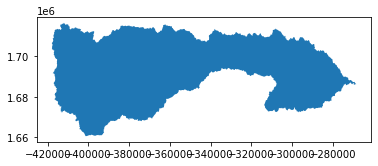

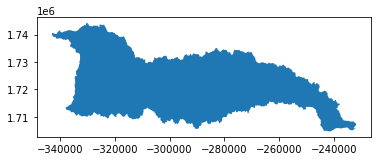

In [25]:
for ws, name in wss_dic.items():
    huc = name[1]
    ref = name[0]

    #get huc 
    huc4 = huc[:4]
    huc_level = len(huc)
    nhd = process_inputs.download_nhd(
            huc4=huc4, 
            gdb_dir=config.root/config.nhd.out_file.gdb, 
            overwrite=overwrite
            )
    local_hucs = gpd.read_file(nhd, layer='WBDHU{}'.format(huc_level))
    process_inputs.write_file(local_hucs,config.root/config.huc_bounds.in_file)


    # HUC boundaries 
    logger.info("reprojecting HUC {0} boundary shapefile to EPSG {1}".format(huc_level,config.sr))
    gdf =process_inputs.get_huc_boundary(
        gdb_path=config.root/config.nhd.out_file.gdb, 
        out_file=config.root/config.huc_bounds.out_file.geojson, 
        huc=huc, 
        sr=config.sr, 
        overwrite=overwrite
    )

    gdf.plot()

    ### Import Flow Direction & Points

    #import watershed vectors,
    logger.info("importing huc boundary")
    gs.run_command('v.import', input=config.root/config.huc_bounds.out_file.geojson, output="huc",overwrite = True)
    gs.run_command('v.buffer', input='huc', output='hucbuff', distance=config.huc_buff) 

    gs.run_command('v.select', ainput = 'pour_points',binput = 'hucbuff', output = 'pour_points_{}'.format(ws), operator = 'intersects')

    reg = gs.parse_command('g.region',raster='{0}_3m_{1}'.format(config.hydro_dem,ws),flags='pgm')

    #gs.run_command('r.mask', vector="hucbuff")

    config.mem = 18000

    config.flow_dir = 'flow_dir_{}'.format(ws)
    config.accum = 'accum_{}'.format(ws)

    gs.run_command(
            'r.info', 
            map = '{0}_3m_{1}'.format(config.hydro_dem,ws))
    
     ### Create Basin Delineation

    reg = gs.parse_command('g.region',raster=config.flow_dir,align=config.flow_dir,flags='pgm')

    v_basins = 'pawnee_wal_basin_v_{}'.format(ws)
    r_basins = 'pawnee_wal_basin_r_{}'.format(ws)
    pour_points = 'pour_points_{}'.format(ws)
    cell_area = (float(reg['nsres']) * float(reg['ewres']))

    gs.run_command("r.stream.snap", 
                           input= pour_points,
                       output ='{}_snapped'.format(pour_points),
                      radius=30, accumulation= config.accum, threshold = (config.thresholds['stream'] // cell_area)*10000)

    gs.run_command("r.stream.basins", 
                       direction = config.flow_dir,
                       basins = r_basins,
                       points ='{}_snapped'.format(pour_points),
                       memory = config.mem,
                       overwrite=True,
                       flags ='m'
                  )

    out_dir = config.root/'outputs'

    gs.run_command('r.to.vect',input = r_basins,output = v_basins, type = 'area')

    gs.run_command('v.clean',input = v_basins,threshold = 500*np.sqrt(cell_area),tool='rmarea',output = '{}_clean'.format(v_basins))

    gs.run_command('v.out.ogr', input=  '{}_clean'.format(v_basins) ,type = 'area',output = config.root/'outputs'/'{}.shp'.format(v_basins), format = 'ESRI_Shapefile')

# END

# END

# END

# END

# END

### Create Accumulation Grid

In [ ]:
#for loop by HUC12

In [ ]:
ppoints = gpd.read_file(config.root/'pour_points'/'pawnee'/'watershed_delineation_points.shp')

In [ ]:
ppoints_nad = ppoints.to_crs(4269)

In [ ]:
ppoints_nad['huc12'] = ppoints_nad.geometry.apply(lambda x: get_huc12(x.__geo_interface__['coordinates']))

In [ ]:
ppoints_nad['upstream_list'] = ppoints_nad.huc12.apply(lambda x:get_upstream_basin_areas(x,'huc12'))

In [ ]:
first_pass = ppoints_nad.iloc[0]['upstream_list']

In [ ]:
ppoints_nad.iloc[0]['huc12']

In [ ]:
flow_dir = 'flow_dir_grass'

In [ ]:
for huc12 in first_pass:
    short_value = huc12[-7:]
    GRASS_vector_files= [file for line in gs.list_strings(type='vector') for file in [line.split("@")[0]]]
    GRASS_raster_files= [file for line in gs.list_strings(type='raster') for file in [line.split("@")[0]]]
    accum = 'r_accum_'+huc12
    basins = 'basin_'+huc12
    v_basins = 'v_'+basins  
    gs.run_command('v.import', input= config.root/config.nhd.out_file.gdb, layer = 'WBDHU12',  output= huc12s)
    gs.run_command('v.extract', input =huc12s, where= "HUC12='%s'" % huc12, output = 'tmp_huc')
    gs.run_command('v.buffer',input='tmp_huc',output='tmp_huc_buffer',distance = config.huc_buff)
    gs.run_command('g.region',vector = 'tmp_huc_buffer',align=flow_dir)
    gs.run_command(
            'r.accumulate', 
            direction=flow_dir, 
            format='auto', 
            accumulation = accum,
            overwrite=True
        )
    gs.run_command("r.stream.snap", 
                       input= 'pour_points',
                   output ='{}_snapped'.format('pour_points'),
                  radius=(50), accumulation= config.accum, threshold = (config.thresholds['stream'] // cell_size**2)*15)
    gs.run_command('r.stream.basins',overwrite=True,\
                      direction=flow_dir,points='{}_snapped'.format('pour_points'),\
                      basins = basins)
    gs.run_command('r.mapcalc',overwrite=True,\
                  expression='%s = if(%s >= 0,%s,null())' %('out_'+basins,basins,short_value))
    


[2022-05-11 13:15:54,343] [INFO] [process_inputs] : NHD download already exists; not redownloading.
[2022-05-11 13:15:57,095] [INFO] [2564532071] : reprojecting HUC 8 boundary shapefile to EPSG 5070
[2022-05-11 13:15:59,852] [INFO] [2564532071] : importing huc boundary
Check if OGR layer <huc11030006_sr5070> contains polygons...
   0 100
Creating attribute table for layer <huc11030006_sr5070>...
Importing 1 features (OGR layer <huc11030006_sr5070>)...
   0 100
-----------------------------------------------------
Registering primitives...
-----------------------------------------------------
Cleaning polygons
-----------------------------------------------------
Breaking polygons...
Breaking polygons (pass 1: select break points)...
 100
Breaking polygons (pass 2: break at selected points)...
 100
-----------------------------------------------------
Removing duplicates...
 100
-----------------------------------------------------
Breaking boundaries...
   0 100
-----------------------

 +----------------------------------------------------------------------------+
 | Map:      hydro_dem_pw_3m_lwc            Date: Sun May  1 13:25:11 2022    |
 | Mapset:   ML                             Login of Creator: jovyan          |
 | Location: huc11030006_sr5070                                               |
 | DataBase: /home/grassdata                                                  |
 | Title:    Resample by bilinear interpolation                               |
 | Timestamp: none                                                            |
 |----------------------------------------------------------------------------|
 |                                                                            |
 |   Type of Map:  raster               Number of Categories: 0               |
 |   Data Type:    DCELL                                                      |
 |   Rows:         48137                                                      |
 |   Columns:      65613                

Reading raster map <accum_lwc>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
         search radius.
         search radius.
         search radius.
         search radius.
         overwritten
Building topology for vector map <pour_points_lwc_snapped@ML>...
Registering primitives...
Memory swap calculation (may take some time)...
Reading raster map <flow_dir_lwc>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Calculating basins using vector point map...
Delineating basins for 4 outlets...
   0  25  50  75 100
Writing raster map <pawnee_wal_basin_r_lwc>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
         overwritten
Extracting areas...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42

CalledModuleError: Module run None r.info map=hydro_dem_pw_3m_pw ended with error
Process ended with non-zero return code 1. See errors in the (error) output.

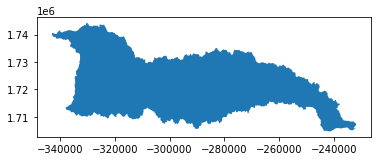

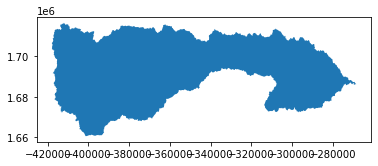

In [9]:
for ws, name in wss_dic.items():
    huc = name[1]
    ref = name[0]

    #get huc 
    huc4 = huc[:4]
    huc_level = len(huc)
    nhd = process_inputs.download_nhd(
            huc4=huc4, 
            gdb_dir=config.root/config.nhd.out_file.gdb, 
            overwrite=overwrite
            )
    local_hucs = gpd.read_file(nhd, layer='WBDHU{}'.format(huc_level))
    process_inputs.write_file(local_hucs,config.root/config.huc_bounds.in_file)


    # HUC boundaries 
    logger.info("reprojecting HUC {0} boundary shapefile to EPSG {1}".format(huc_level,config.sr))
    gdf =process_inputs.get_huc_boundary(
        gdb_path=config.root/config.nhd.out_file.gdb, 
        out_file=config.root/config.huc_bounds.out_file.geojson, 
        huc=huc, 
        sr=config.sr, 
        overwrite=overwrite
    )

    gdf.plot()

    ### Import Flow Direction & Points

    #import watershed vectors,
    logger.info("importing huc boundary")
    gs.run_command('v.import', input=config.root/config.huc_bounds.out_file.geojson, output="huc",overwrite = True)
    gs.run_command('v.buffer', input='huc', output='hucbuff', distance=config.huc_buff) 

    gs.run_command('v.select', ainput = 'pour_points',binput = 'hucbuff', output = 'pour_points_{}'.format(ws), operator = 'intersects')

    reg = gs.parse_command('g.region',raster=config.hydro_dem,flags='pgm')

    gs.run_command('r.mask', vector="hucbuff")

    config.mem = 18000

    reg = gs.parse_command('g.region',raster=config.hydro_dem,res=3,flags='pgm')

    config.flow_dir = 'flow_dir_{}'.format(ws)
    config.accum = 'accum_{}'.format(ws)

    gs.run_command(
            'r.info', 
            map = '{0}_3m_{1}'.format(config.hydro_dem,ws))

    ### Create Basin Delineation

    reg = gs.parse_command('g.region',raster=config.flow_dir,align=config.flow_dir,flags='pgm')

    v_basins = 'pawnee_wal_basin_v_{}'.format(ws)
    r_basins = 'pawnee_wal_basin_r_{}'.format(ws)
    pour_points = 'pour_points_{}'.format(ws)
    cell_area = (float(reg['nsres']) * float(reg['ewres']))

    gs.run_command("r.stream.snap", 
                           input= pour_points,
                       output ='{}_snapped'.format(pour_points),
                      radius=(6), accumulation= config.accum, threshold = (config.thresholds['stream'] // cell_area)*10)

    gs.run_command("r.stream.basins", 
                       direction = config.flow_dir,
                       basins = r_basins,
                       points ='{}_snapped'.format(pour_points),
                       memory = config.mem,
                       overwrite=True,
                       flags ='m'
                  )

    out_dir = config.root/'outputs'

    gs.run_command('r.to.vect',input = r_basins,output = v_basins, type = 'area')

    gs.run_command('v.clean',input = v_basins,threshold = 500*np.sqrt(cell_area),tool='rmarea',output = '{}_clean'.format(v_basins))

    logger.info('Exporting accumulation raster to : {}'.format(out_dir))
    plot_grass_layer('{}_clean'.format(v_basins), str(config.log.out/"basins.png"), vector=True)

    gs.run_command('v.out.ogr', input=  '{}_clean'.format(v_basins) ,type = 'area',output = config.root/'outputs'/'{}.shp'.format(v_basins), format = 'ESRI_Shapefile')

### Get HUC vector

### Import Flow Direction & Points

In [ ]:
config.hydro_dem

'hydro_dem_pw'